# 第四章(Numpy基础:数组和矢量计算)

## Numpy的ndarray

### 创建numpy

In [1]:
import numpy as np

In [17]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1, arr1.dtype)

data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
print(arr2, arr2.dtype, arr2.ndim, arr2.shape)

[6.  7.5 8.  0.  1. ] float64
[[1 2 3 4]
 [5 6 7 8]] int64 2 (2, 4)


### 创建零一数组＆空数组

In [3]:
# np.zeros 返回全是零的数组
print(np.zeros(10) , '\n')
print(np.zeros((3, 6)) , '\n')

# np.ones 返回全是1的数组
print(np.ones((2, 5)), '\n')

# np.empty返回未经过初始化的垃圾值
print(np.empty((2,3,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

[[[1.49166815e-154 1.49166815e-154]
  [3.45845952e-323 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]

 [[0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]]


### ndarray的数据类型

In [8]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype, arr2.dtype)

float64 int32


In [9]:
# 通过ndarray的astype方法显式的装换其dtpye
arr = np.array([1, 2, 3, 4, 5])
folat_arr = arr.astype(np.float64)
print(arr.dtype, folat_arr.dtype)

int64 float64


### 数组和标量之间的运算

In [12]:
arr = np.array([[1, 2, 3], [4 , 5, 6]])

print(arr, '\n')
print(arr * arr, '\n')
print(arr - arr, '\n')
print(1/arr, '\n')
print(arr ** 0.5, '\n')

[[1 2 3]
 [4 5 6]] 

[[ 1  4  9]
 [16 25 36]] 

[[0 0 0]
 [0 0 0]] 

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



### 基本的索引和切片

In [21]:
# 一维数组的操作
# 数组和列表的区别在于,数组切片是原始数组的视图,数据不会被复制,视图上的任何修改都会直接反应到源数组上
arr = np.arange(10)
print(arr, '\n', arr[5], '\n', arr[5:8])
arr[5:8] = 12
print(arr)
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr)

# 如果想要的是一份复制的数组可以用以下方式
arr_copy = arr[5:8].copy()
print(arr_copy)

[0 1 2 3 4 5 6 7 8 9] 
 5 
 [5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
[    0     1     2     3     4    12 12345    12     8     9]
[   12 12345    12]


In [18]:
# 二维数组
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
print(arr2d, '\n', arr2d[2], '\n', arr2d[0][2])

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
 [7 8 9] 
 3


### 切片索引

In [19]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

In [22]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
# 高维度数组是沿着第0轴切片的(切片沿着一个轴向选取元素)
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [26]:
# 通过将整数索引和切片混合,可以得到低维度的切片
arr2d[1, :2], arr2d[2, :1]

(array([4, 5]), array([7]))

In [27]:
# 只有冒号表示整个轴
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### 布尔型索引

In [4]:
names = np.array(['bob', 'joe', 'will', 'bob', 'will', 'joe', 'joe'])

In [8]:
from numpy.random import randn
data = randn(7, 4)
print(data)

[[-0.6798123   0.39947658  0.4103153  -1.14061319]
 [-0.13716817  0.48585947  1.20130039  0.46578746]
 [ 0.15799355 -0.35945384 -1.46767065 -2.26402695]
 [ 1.0295143  -0.22732851  1.28531416  0.16897769]
 [ 2.09954193 -0.33837667  0.66420364  0.86708084]
 [ 1.06685242 -1.08043412  0.40103539  0.88038567]
 [ 1.45864048  0.30032451  1.02008847 -0.21884638]]


In [9]:
names == 'bob'

array([ True, False, False,  True, False, False, False])

In [10]:
# 选则了data的第0,3个元素,即对应的True的位置
data[names == 'bob']

array([[-0.6798123 ,  0.39947658,  0.4103153 , -1.14061319],
       [ 1.0295143 , -0.22732851,  1.28531416,  0.16897769]])

In [13]:
# 通过布尔型索引设置值
data[data < 0] = 1
data

array([[1.        , 0.39947658, 0.4103153 , 1.        ],
       [1.        , 0.48585947, 1.20130039, 0.46578746],
       [0.15799355, 1.        , 1.        , 1.        ],
       [1.0295143 , 1.        , 1.28531416, 0.16897769],
       [2.09954193, 1.        , 0.66420364, 0.86708084],
       [1.06685242, 1.        , 0.40103539, 0.88038567],
       [1.45864048, 0.30032451, 1.02008847, 1.        ]])

### 花式索引

In [17]:
# 花式索引是指利用整数数组进行索引
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [18]:
# 为了以特定的顺序选取子集,只需要传入一个指定顺序的整数列表或者ndarray即可
arr[[4, 3, 0 ,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [21]:
arr2 = np.arange(32).reshape((8, 4))
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [25]:
# 一次传入多个索引数组,返回一个一维数组
arr2[[1, 5, 7, 2],[0, 3, 1, 2]]
# 最终的结果是(1, 0), (5, 3), (7, 1), (2, 2)这几个数

array([ 4, 23, 29, 10])

In [30]:
# 若要选取一个矩形的区域
arr2[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [31]:
# 或者使用np._ix方法,结果与上面相同
arr2[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置和轴的对换

In [32]:
arr2.T

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

## 通用函数:快速的元素级数组函数

In [2]:
# 通用函数是对nparray中的数据执行元素级运算的函数
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [4]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

## 利用函数进行数据处理

In [8]:
# 假设我们想要在一组值(网格型)上计算sqrt(x^2 + y^2)
# np.meshgrid函数接受两个一维数组,并产生两个二维数组(对应于两个数组中的所有(x, y)对)
points = np.arange(-5, 5, 0.01)
xs, ys =np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [9]:
import matplotlib.pyplot as plt
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

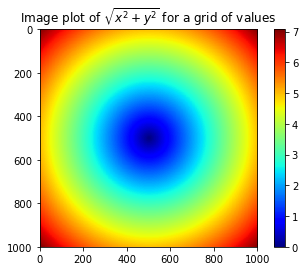

In [18]:
plt.imshow(z, cmap=plt.cm.jet) # cmap颜色图谱比较常用的有gray,jet
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')
plt.show()

### 将条件逻辑表述转化成数组运算